# 원-핫 표현

## 코드 1-1. 사이킷런을 사용하여 원-핫 벡터 또는 이진 표현 만들기

<Axes: >

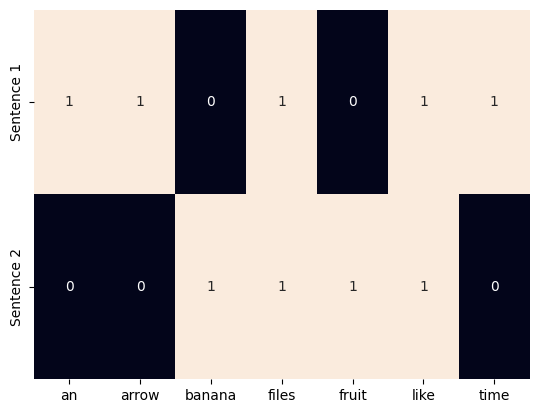

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# corpus = 말뭉치
corpus = ['Time files like an arrow.',
          'Fruit files like a banana.']

# binary = True로 해서 원-핫 인코딩 진행
one_hot_vectorizer = CountVectorizer(binary = True)

# CountVectorizer는 희소 행렬(sparse matrix)을 반환하므로 toarray() 메서드를 사용해 밀집 행렬(dense matrix)로 변환
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out()

sns.heatmap(one_hot, annot = True,
            cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

# TF-IDF 표현

## 코드 1-2. 사이킷런을 사용해 TF-IDF 표현 만들기

<Axes: >

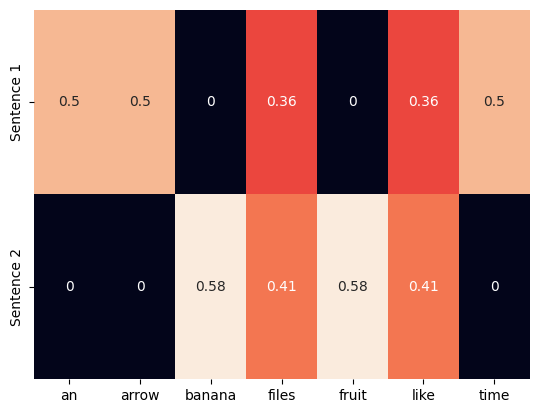

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

sns.heatmap(tfidf, annot = True, cbar = False, xticklabels = vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

# 파이토치 기초

## 파이토치 설치

In [8]:
!pip3 install torch
!pip3 install torchvision

In [9]:
import torch
import torchvision

## 코드 1-3. 파이토치에서 torch.Tensor로 텐서 만들기

In [10]:
def describe(x):
    print('타입: {}'.format(x.type()))
    print('크기: {}'.format(x.shape))
    print('값: {}'.format(x))

In [11]:
describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-4.2974e+18,  4.4252e-41, -1.0367e+21],
        [ 4.4250e-41, -2.2835e+18,  4.4252e-41]])


## 코드 1-4. 랜덤하게 초기화한 텐서 만들기

In [12]:
# (0, 1) 범위의 균등 분포에서 샘플링한 값으로 랜덤하게 초기화한 텐서 만들기
describe(torch.rand(2, 3)) # 균등 분포

# '표준 정규 분포'에서 샘플링한 값으로 랜덤하게 초기화한 텐서 만들기
describe(torch.randn(2, 3)) # 표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.1341, 0.2045, 0.1681],
        [0.5067, 0.2400, 0.8881]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-1.0098, -0.4372,  0.0789],
        [-0.7049, -0.2460, -0.3629]])


## 코드 1-5. filled() 메서드 사용하기

In [61]:
# 0으로 채운 텐서 만들기
describe(torch.zeros(2, 3))

# 1로 채운 텐서 만들기
x = torch.ones(2, 3)
describe(x)

# 밑줄 문자(_)가 있는 파이토치 인-플레이스 메서드는 텐서값을 바꾸는 연산을 의미
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [63]:
# 정규 분포
x.normal_()
describe(x)

# 균등 분포
x.uniform_()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.8507,  1.2489,  1.8437],
        [ 1.3093, -0.1150, -1.7961]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.0235, 0.4937, 0.4853],
        [0.3577, 0.5840, 0.4359]])


## 코드 1-6. 파이썬 리스트로 텐서를 만들고 초기화하기

In [14]:
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 코드 1-7. 넘파이로 텐서를 만들고 초기화하기

In [15]:
import numpy as np

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))
# numpy 배열의 기본 데이터 타입이 float64이기 때문에 텐서 타입이 FloatTensor가 아니라 DoubleTensor이다.

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: tensor([[0.6883, 0.7703, 0.6448],
        [0.7555, 0.1260, 0.6356]], dtype=torch.float64)


## 코드 1-8. 텐서 속성

In [16]:
# 특정 텐서 타입의 생성자를 직접 호출
x = torch.FloatTensor([[1, 2, 3],
                      [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [17]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
# torch.tensor 메서드와 dtype 매개변수 사용
x = torch.tensor([[1, 2, 3],[4, 5, 6]], dtype = torch.int64)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [19]:
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 코드 1-9. 텐서 연산: 덧셈

In [20]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.3848, -0.2701, -1.4195],
        [-0.8391,  0.2858,  0.5547]])


In [21]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.7696, -0.5403, -2.8390],
        [-1.6783,  0.5716,  1.1094]])


In [22]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.7696, -0.5403, -2.8390],
        [-1.6783,  0.5716,  1.1094]])


## 코드 1-10. 차원별 텐서 연산

In [23]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: tensor([0, 1, 2, 3, 4, 5])


In [24]:
x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [25]:
describe(torch.sum(x, dim = 0))

타입: torch.LongTensor
크기: torch.Size([3])
값: tensor([3, 5, 7])


In [26]:
describe(torch.sum(x, dim = 1))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([ 3, 12])


In [27]:
# transpose() 함수는 두 번째와 세 번째의 매개변수로 전달된 차원을 전치한 텐서를 만든다.
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[0, 3],
        [1, 4],
        [2, 5]])


## 코드 1-11. 텐서 슬라이싱과 인덱싱

In [28]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [29]:
describe(x[:1, :2])

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: tensor([[0, 1]])


In [30]:
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([])
값: 1


## 코드 1-12. 복잡한 인덱싱, 연속적이지 않은 텐서 인덱스 참조하기

In [31]:
indices = torch.LongTensor([0, 2])
describe(indices)
describe(torch.index_select(x, dim = 1, index = indices))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 2])
타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[0, 2],
        [3, 5]])


In [32]:
indices = torch.LongTensor([0, 0])
describe(indices)
describe(torch.index_select(x, dim = 0, index = indices))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 0])
타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [0, 1, 2]])


In [33]:
row_indices = torch.arange(2).long()
describe(row_indices)
col_indices = torch.LongTensor([0, 1])
describe(col_indices)
describe(x[row_indices, col_indices])

# 인덱스는 LongTensor여야 함.

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 1])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 1])
타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 4])


## 코드 1-13. 텐서 연결

In [34]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [35]:
describe(torch.cat([x, x], dim = 0))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [36]:
describe(torch.cat([x, x], dim = 1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [37]:
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


## 코드 1-14. 텐서의 선형 대수 계산: 행렬 곱셈

In [38]:
x1 = torch.arange(6).view(2, 3)
x1 = x1.float()
describe(x1)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [39]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [40]:
describe(torch.mm(x1, x2))

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[ 3.,  6.],
        [12., 24.]])


## 코드 1-15. 그레디언트 연산을 할 수 있는 텐서 만들기

In [41]:
# requires_grad 불리언 매개변수를 True로 하면 그래디언트 기반 학습에 필요한 손실 함수와 텐서의 그래디언트를 기록하는 부가 연산을 활성화함

x = torch.ones(2, 2, requires_grad = True)
describe(x)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [42]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [43]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([])
값: 21.0
False


In [44]:
x.grad

tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])

## 코드 1-16. CUDA 텐서 만들기

In [45]:
print(torch.cuda.is_available())

True


In [46]:
# 바람직한 방법: 장치에 무관한 텐서 초기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [47]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.3003, 0.7023, 0.2071],
        [0.4658, 0.7263, 0.3132],
        [0.3210, 0.1912, 0.9359]], device='cuda:0')


In [48]:
y = torch.rand(3, 3)

In [49]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[0.5584, 0.7224, 0.4645],
        [0.6393, 0.9421, 0.9238],
        [1.1120, 0.9240, 1.4316]])

# 연습문제

## 문제 1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가하세요

In [50]:
a = torch.rand(3, 3)
describe(a)
a = a.unsqueeze(0)
describe(a)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.5291, 0.3153, 0.2546],
        [0.7538, 0.7573, 0.9910],
        [0.4155, 0.6536, 0.8115]])
타입: torch.FloatTensor
크기: torch.Size([1, 3, 3])
값: tensor([[[0.5291, 0.3153, 0.2546],
         [0.7538, 0.7573, 0.9910],
         [0.4155, 0.6536, 0.8115]]])


## 문제 2. 이진 텐서에 추가한 차원을 삭제하세요.

In [51]:
a = a.squeeze(0)
describe(a)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.5291, 0.3153, 0.2546],
        [0.7538, 0.7573, 0.9910],
        [0.4155, 0.6536, 0.8115]])


## 문제 3. 범위가 [3, 7]이고 크기가 5x3인 랜덤한 텐서를 만드세요.

In [52]:
b = 3 + torch.rand(5, 3) * 4
describe(b)

타입: torch.FloatTensor
크기: torch.Size([5, 3])
값: tensor([[5.3042, 6.9639, 4.6467],
        [4.1085, 5.5953, 4.4730],
        [5.1860, 5.7432, 3.4452],
        [6.4337, 6.6592, 4.1075],
        [3.8710, 4.8978, 4.1895]])


## 문제 4. 정규 분포를 사용해 텐서를 만드세요.

In [53]:
c = torch.randn(3, 3)
c = c.normal_()
describe(c)

타입: torch.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[-1.4264,  1.2980,  0.7126],
        [ 0.2138,  0.5104, -1.1531],
        [-1.0515,  0.4026, -1.2027]])


## 문제 5. 텐서 torch.Tensor([1, 1, 0, 1])에서 0이 아닌 원소의 인덱스를 추출하세요.

In [54]:
d = torch.Tensor([1, 1, 1, 0, 1])
torch.nonzero(d)

tensor([[0],
        [1],
        [2],
        [4]])

## 문제 6. 크기가 (3, 1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요.

In [55]:
e = torch.rand(3, 1)
describe(e)
e = e.expand(3, 4)
describe(e)

타입: torch.FloatTensor
크기: torch.Size([3, 1])
값: tensor([[0.5341],
        [0.8003],
        [0.3819]])
타입: torch.FloatTensor
크기: torch.Size([3, 4])
값: tensor([[0.5341, 0.5341, 0.5341, 0.5341],
        [0.8003, 0.8003, 0.8003, 0.8003],
        [0.3819, 0.3819, 0.3819, 0.3819]])


## 문제 7. 두 개의 2차원 행렬(a=torch.rand(3,4,5), b=torch.rand(3,5,4))의 배치 행렬 곱셈(batch matrix-matrix product)을 계산하세요.

In [56]:
a = torch.rand(3, 4, 5)
b = torch.rand(3, 5, 4)
torch.bmm(a, b)

tensor([[[2.6309, 2.2600, 1.1708, 1.3579],
         [2.6212, 2.2802, 1.3905, 1.5463],
         [2.0481, 1.7606, 1.1143, 1.4049],
         [2.9164, 2.5366, 1.2913, 1.8156]],

        [[0.7934, 0.6955, 0.3675, 0.6213],
         [1.9106, 1.6934, 1.5929, 2.4696],
         [1.0746, 0.9949, 1.2816, 1.9462],
         [1.6233, 1.3891, 1.6392, 1.9096]],

        [[1.3973, 1.6162, 1.0543, 1.3404],
         [1.2996, 1.4788, 1.0698, 1.5130],
         [2.3025, 2.1742, 1.8501, 2.5297],
         [1.4816, 1.4469, 1.1523, 1.4807]]])

## 문제 8. 3차원 행렬(a=torch.rand(3,4,5))과 2차원 행렬(b=torch.rand(5,4))의 배치 행렬 곱셈을 계산하세요.

In [57]:
a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
torch.matmul(a, b)

tensor([[[1.1904, 1.0432, 0.4376, 0.7955],
         [1.5334, 1.4138, 0.3204, 0.7169],
         [1.4987, 1.4103, 0.5860, 1.0638],
         [1.2689, 1.2083, 0.6223, 1.0489]],

        [[1.1477, 1.6570, 0.8239, 1.0201],
         [1.0419, 1.4394, 0.7146, 0.8780],
         [1.6002, 1.7655, 1.1622, 1.6399],
         [1.3629, 1.7504, 1.0203, 1.3193]],

        [[1.2654, 1.7368, 0.4452, 0.5739],
         [1.0019, 1.0472, 0.5352, 0.8241],
         [1.5912, 1.8143, 0.5765, 0.9150],
         [1.5766, 1.4532, 0.4937, 0.9322]]])

In [58]:
torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size()))

tensor([[[1.1904, 1.0432, 0.4376, 0.7955],
         [1.5334, 1.4138, 0.3204, 0.7169],
         [1.4987, 1.4103, 0.5860, 1.0638],
         [1.2689, 1.2083, 0.6223, 1.0489]],

        [[1.1477, 1.6570, 0.8239, 1.0201],
         [1.0419, 1.4394, 0.7146, 0.8780],
         [1.6002, 1.7655, 1.1622, 1.6399],
         [1.3629, 1.7504, 1.0203, 1.3193]],

        [[1.2654, 1.7368, 0.4452, 0.5739],
         [1.0019, 1.0472, 0.5352, 0.8241],
         [1.5912, 1.8143, 0.5765, 0.9150],
         [1.5766, 1.4532, 0.4937, 0.9322]]])

In [59]:
add = b.unsqueeze(0).expand(a.size(0), *b.size())
describe(add)

타입: torch.FloatTensor
크기: torch.Size([3, 5, 4])
값: tensor([[[0.9134, 0.8368, 0.0121, 0.2442],
         [0.5176, 0.3499, 0.3572, 0.5618],
         [0.0456, 0.7435, 0.3853, 0.1907],
         [0.7097, 0.4478, 0.5283, 0.9263],
         [0.6127, 0.7820, 0.1067, 0.1587]],

        [[0.9134, 0.8368, 0.0121, 0.2442],
         [0.5176, 0.3499, 0.3572, 0.5618],
         [0.0456, 0.7435, 0.3853, 0.1907],
         [0.7097, 0.4478, 0.5283, 0.9263],
         [0.6127, 0.7820, 0.1067, 0.1587]],

        [[0.9134, 0.8368, 0.0121, 0.2442],
         [0.5176, 0.3499, 0.3572, 0.5618],
         [0.0456, 0.7435, 0.3853, 0.1907],
         [0.7097, 0.4478, 0.5283, 0.9263],
         [0.6127, 0.7820, 0.1067, 0.1587]]])
